<h2> Financial Dataset </h2>

In [286]:
import yfinance as yf
import pandas as pd

<h3> Single Ticker </h3>

In [148]:
# create ticker
spy = yf.Ticker('spy')

In [325]:
# get historical data
spy_historical = spy.history(period='5y')

# no stock splits

In [366]:
# add key metrics as additional features

# percent change
spy_historical['Change %'] = (spy_historical['Close'] - spy_historical['Open']) / spy_historical['Open'] * 100
# holding period return
spy_historical['HPR'] = (spy_historical['Close'] - spy_historical.shift(1)['Close'] + spy_historical['Dividends']) / spy_historical.shift(1)['Close'] * 100
# high low percentage
spy_historical['HL %'] = (spy_historical['High'] - spy_historical['Low']) / spy_historical['Low'] * 100

# market capitalization
spy_historical['Mkt Cap ($B)'] = spy_historical['Close'] * 0.9026

# drop first row - doesn't have calculated HPR
spy_historical.drop(index=spy_historical.index[0], axis=0, inplace=True)

spy_historical.round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change %,HPR,HL %,Mkt Cap ($B)
Date,,,,,,,,,,,
2016-11-14,198.16,198.38,196.97,197.76,94580000,0.0,0,-0.20,0.08,0.72,178.50
2016-11-15,198.17,199.30,197.95,199.30,91652600,0.0,0,0.57,0.78,0.68,179.89
2016-11-16,198.65,199.18,198.52,198.93,65617700,0.0,0,0.14,-0.19,0.33,179.55
2016-11-17,199.09,200.02,198.98,199.95,69797200,0.0,0,0.43,0.51,0.52,180.48
2016-11-18,200.03,200.21,199.31,199.51,86265800,0.0,0,-0.26,-0.22,0.45,180.07
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,457.20,458.49,455.56,455.96,56075100,0.0,0,-0.27,0.09,0.64,411.55
2021-10-27,456.45,457.16,453.86,453.94,72438000,0.0,0,-0.55,-0.44,0.73,409.73
2021-10-28,455.46,458.40,455.45,458.32,51437900,0.0,0,0.63,0.96,0.65,413.68


In [359]:
spy_historical.round(2).to_csv('spy_historical.csv')

<h3> Multiple Tickers </h3>

In [355]:
# define tickers
tickers = ['AAPL', 'AMZN', 'TSLA', 'GOOG']

# define timeframe
period = '5y' # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [356]:
# retrieve historical stock financials within period for defined tickers
stocks_historical = yf.download(' '.join(tickers), period=period, group_by='ticker', actions=True)

[*********************100%***********************]  4 of 4 completed


In [363]:
# move ticker info to subindex date
stocks_historical = stocks_historical.stack(level=0)

# add key metrics as additional features
# percent change
stocks_historical['Change %'] = (stocks_historical['Close'] - stocks_historical['Open']) / stocks_historical['Open'] * 100
# holding period return
stocks_historical['HPR'] = (stocks_historical['Close'] - stocks_historical.shift(1)['Close'] + stocks_historical['Dividends']) / stocks_historical.shift(1)['Close'] * 100
# high low percentage
stocks_historical['HL %'] = (stocks_historical['High'] - stocks_historical['Low']) / stocks_historical['Low'] * 100

# restructure index so tickers appear together as first column level
stocks_historical = stocks_historical.unstack().swaplevel(0, 1, axis=1)
# drop first row - doesn't have calculated HPR
stocks_historical.drop(index=stocks_historical.index[0], axis=0, inplace=True)

# brute force market capitalization
get_current_shares = lambda ticker: yf.Ticker(ticker).info.get('sharesOutstanding', 0) / 1e9
# stocks_historical = stocks_historical.assign(MktCap=get_current_market_cap)
for ticker in stocks_historical.columns.unique(level=0).values:
    stocks_historical[ticker, 'Mkt Cap ($B)'] = get_current_shares(ticker) * stocks_historical[ticker, 'Close']
stocks_historical.sort_index(axis=1).round(2)

AAPL                                                          \
           Adj Close Change %   Close Dividends  HL %    HPR    High     Low   
Date                                                                           
2016-11-07     26.02     0.30   27.60       0.0  0.96 -27.58   27.63   27.36   
2016-11-08     26.17     0.68   27.76       0.0  1.84 -28.15   27.93   27.42   
2016-11-09     26.13     0.91   27.72       0.0  3.03 -28.90   27.83   27.01   
2016-11-10     25.40    -2.97   26.95       0.0  4.97 -29.11   27.77   26.46   
2016-11-11     25.55     1.22   27.11       0.0  2.18 -26.87   27.22   26.64   
...              ...      ...     ...       ...   ...    ...     ...     ...   
2021-10-26    149.32    -0.01  149.32       0.0  1.23 -85.43  150.84  149.01   
2021-10-27    148.85    -0.34  148.85       0.0  0.84 -85.38  149.73  148.49   
2021-10-28    152.57     1.84  152.57       0.0  2.30 -85.30  153.17  149.72   
2021-10-29    149.80     1.75  149.80       0.0  2.41 -86.09  149.94  146.41   
2021-11-01    148.96    -0.02  148.96       0.0  1.29 -86.63  149.70  147.80   

                                 ...     TSLA                                  \
           Mkt Cap ($B)    Open  ...    Close Dividends  HL %    HPR     High   
Date                             ...                                            
2016-11-07       456.27   27.52  ...    38.64       0.0  2.23 -95.06    38.86   
2016-11-08       458.96   27.58  ...    38.99       0.0  3.26 -95.07    39.50   
2016-11-09       458.22   27.47  ...    38.01       0.0  4.38 -95.16    38.40   
2016-11-10       445.45   27.77  ...    37.07       0.0  6.20 -95.14    38.32   
2016-11-11       448.09   26.78  ...    37.71       0.0  3.21 -95.00    37.78   
...                 ...     ...  ...      ...       ...   ...    ...      ...   
2021-10-26      2468.29  149.33  ...  1018.43       0.0  9.34 -63.54  1094.94   
2021-10-27      2460.52  149.36  ...  1037.86       0.0  3.89 -64.56  1070.88   
2021-10-28      2522.01  149.82  ...  1077.04       0.0  2.54 -63.15  1081.00   
2021-10-29      2476.22  147.22  ...  1114.00       0.0  3.91 -62.43  1115.21   
2021-11-01      2462.34  148.99  ...  1208.59       0.0  8.14 -57.97  1209.75   

                                                                  
                Low Mkt Cap ($B)     Open Stock Splits    Volume  
Date                                                              
2016-11-07    38.01        38.81    38.72          0.0  19350500  
2016-11-08    38.25        39.15    38.76          0.0  16338000  
2016-11-09    36.79        38.17    37.38          0.0  40865500  
2016-11-10    36.08        37.23    38.21          0.0  33751500  
2016-11-11    36.60        37.87    36.85          0.0  19942500  
...             ...          ...      ...          ...       ...  
2021-10-26  1001.44      1022.77  1024.69          0.0  62415000  
2021-10-27  1030.78      1042.28  1039.66          0.0  38526500  
2021-10-28  1054.20      1081.63  1068.31          0.0  27213200  
2021-10-29  1073.21      1118.75  1081.86          0.0  29918400  
2021-11-01  1118.66      1213.74  1145.00          0.0  56048818  

[1255 rows x 48 columns]

In [362]:
stocks_historical.round(2).to_csv('stocks_historical.csv')

<h2> Twitter Dataset </h2>

In [245]:
import yaml
import tweepy
import pandas as pd
import re
# import nltk
# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [249]:
# nltk.download('stopwords')
# nltk.download('punkt')
%matplotlib inline

In [51]:
# load local api key and secrets
with open('config.yaml') as config:
    api_config = yaml.safe_load(config)

# create api object with oauth2 (no user context)
auth = tweepy.AppAuthHandler(api_config['API_KEY'], api_config['API_KEY_SECRET'])
api = tweepy.API(auth)

In [185]:
# regex for pattern matching url
# source: https://github.com/Traumatizn/RegEx/blob/main/Python/Url_Pattern.md
url_pattern = r'((?:(?<=[^a-zA-Z0-9]){0,}(?:(?:https?\:\/\/){0,1}(?:[a-zA-Z0-9\%]{1,}\:[a-zA-Z0-9\%]{1,}[@]){,1})(?:(?:\w{1,}\.{1}){1,5}(?:(?:[a-zA-Z]){1,})|(?:[a-zA-Z]{1,}\/[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\:[0-9]{1,4}){1})){1}(?:(?:(?:\/{0,1}(?:[a-zA-Z0-9\-\_\=\-]){1,})*)(?:[?][a-zA-Z0-9\=\%\&\_\-]{1,}){0,1})(?:\.(?:[a-zA-Z0-9]){0,}){0,1})'

In [258]:
# preprocesses tweets
def preprocess_tweet(tweet):
    tweet_all_lower = tweet.lower()
    tweet_no_mentions = re.sub(r'@[A-Za-z0-9_]+', '', tweet_all_lower)
    tweet_no_links = re.sub(url_pattern, '', tweet_no_mentions)
    tweet_no_hashtag_symbol = re.sub(r'#', '', tweet_no_links)
    return tweet_no_hashtag_symbol

In [279]:
# create dataframe using tweepy api
df = pd.DataFrame(columns=['Date', 'Original Text', 'Clean Text'])

# for future reference: lang='en' parameter may help improve model accuracy but restricts unclassified tweets
# update to full-archive api (only 250 requests/mo allowed) once we verify functionality of classifier
for tweet in tweepy.Cursor(api.search_tweets, q='$AAPL -filter:retweets').items(1000):
    df = df.append({'Date': tweet.created_at, 'Original Text': tweet.text, 'Clean Text': preprocess_tweet(tweet.text)}, ignore_index=True)

df.set_index('Date')

,Original Text,Clean Text
Date,,
2021-10-28 08:57:02+00:00,"*Starting with $15k, down to $10k, back up to ...","*starting with $15k, down to $10k, back up to ..."
2021-10-28 08:56:46+00:00,$HOOD Ticker Sentiment vs Comment Volume \n$AA...,$hood ticker sentiment vs comment volume \n$aa...
2021-10-28 08:54:25+00:00,Ladies &amp; Gentleman: The new Morgan Stanley...,ladies &amp; gentleman: the new morgan stanley...
2021-10-28 08:52:08+00:00,Tomorrow’s Moves Trends On WBS🚀🚀🚀🌕\n🔥🔥🔥\n$TSLA...,tomorrow’s moves trends on wbs🚀🚀🚀🌕\n🔥🔥🔥\n$tsla...
2021-10-28 08:48:34+00:00,$BKKT 🚀🚀🚀\n\n $GOOGL 🧠\nNOW $MA $AAPL 🧠\n\n#CR...,$bkkt 🚀🚀🚀\n\n $googl 🧠\nnow $ma $aapl 🧠\n\ncry...
...,...,...
2021-10-27 18:50:01+00:00,Global tech monopolies should be broken like S...,global tech monopolies should be broken like s...
2021-10-27 18:49:56+00:00,@hnrtrading Is this a set up you’d be willing ...,is this a set up you’d be willing to front-ru...
2021-10-27 18:49:49+00:00,"Starting with $7k, down to $3k, back up to $29...","starting with $7k, down to $3k, back up to $29..."


(-0.5, 399.5, 199.5, -0.5)

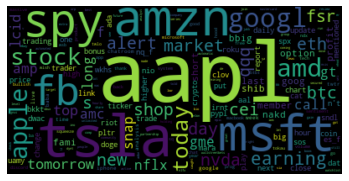

In [280]:
# word cloud to visualize tweets
all_tweet_text = ' '.join([tweet for tweet in df['Clean Text'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')]))])
wordcloud = WordCloud(collocations=False).generate(all_tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [270]:
# tokenize tweet
# one row first
first_tweet_text = df.iloc[0]['Clean Text']
# [word for word in first_result['Clean Text'].split() if word not in stopwords.words('english')]
[word for word in word_tokenize(first_tweet_text) if word not in stopwords.words('english') and not word == '$']

['bkkt',
 '🚀🚀🚀',
 'googl',
 '🧠',
 'aapl',
 '🧠',
 'cryptonews',
 'cryptonews',
 'btc',
 'ethereum',
 'dogecoin',
 'shib',
 'future',
 'payment',
 'all…']

In [367]:
df.to_csv('initial_tweets.csv')

#### Ideas on how to improve future model accuracy
- lang='en' parameter may help improve model accuracy but restricts unclassified tweets
- update to full-archive api (only 250 requests/mo allowed) once we verify functionality of classifier
- filter out tweets with more than a set threshold of tickers ($) to get more accurate sentiments on a specific public company
- use emoji supported sentiment lexicon for initial polarity score label for our sentiment classifier